In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
df_sample = pd.read_csv('./data/calendars/calendar_02_2019.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df_sample.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,7322,2019-02-01,f,$140.00,$140.00,1.0,180.0
1,7097,2019-02-02,t,$180.00,$180.00,2.0,30.0
2,7097,2019-02-03,t,$180.00,$180.00,2.0,30.0
3,7097,2019-02-04,t,$199.00,$199.00,2.0,30.0
4,7097,2019-02-05,t,$199.00,$199.00,2.0,30.0


In [3]:
listing_df = pd.DataFrame({
    "listing_id": [],
    "booked": [],
    "unbooked": [],
    "perc_booked": [],
    "date": [],
    "year": [],
    "month": []
})

for yr in range(2018, 2020):
    for mo in range(1,13):
        if yr == 2019 and mo > 6:
            break
        elif yr == 2018 and mo < 7:
            # do nothing
            print('skipped 2018 month: ' + str(mo))
        else:
            zeroStr = '0' if mo < 10 else ''
            fileName = './data/calendars/calendar' + '_' + zeroStr + str(mo) + '_' + str(yr) + '.csv.gz'
            df_cal = pd.read_csv(fileName, compression='gzip', header=0, sep=',', quotechar='"')
            
            df_cal['date'] = pd.to_datetime(df_cal['date'])
            df_cal['month'] = df_cal['date'].dt.month
            df_cal = df_cal[df_cal['month'] == mo ]
            
            dateObj = pd.to_datetime('1/'+str(mo)+'/'+str(yr), dayfirst=True)
            
#             df_temp = df_cal[df_cal['available'] == 'f'].groupby(['listing_id']).size()
#             df_temp['unbooked'] = df_cal[df_cal['available'] == 't'].groupby(['listing_id']).size()['unbooked']
            
            df_temp = df_cal.groupby('listing_id')['available'].value_counts().unstack().fillna(0)
        
            print(df_temp.head())
            
            df_temp.rename(columns={'f': 'booked', 't': 'unbooked'}, inplace=True)
            
            print(df_temp.head())
            
#             print(df_temp.head())
            
            df_temp['perc_booked'] = df_temp['booked'] / (df_temp['booked'] + df_temp['unbooked'])
            
            df_temp["date"] = dateObj
            df_temp["year"] = dateObj.year
            df_temp["month"] = dateObj.month
            
            listing_df = listing_df.append(df_temp)

# listing_df = listing_df.set_index("date")

print(listing_df.head())
print(listing_df.shape)

skipped 2018 month: 1
skipped 2018 month: 2
skipped 2018 month: 3
skipped 2018 month: 4
skipped 2018 month: 5
skipped 2018 month: 6
available      f     t
listing_id            
2515        17.0  14.0
2539         0.0  31.0
2595         0.0  31.0
3330        23.0   8.0
3647         0.0  31.0
available   booked  unbooked
listing_id                  
2515          17.0      14.0
2539           0.0      31.0
2595           0.0      31.0
3330          23.0       8.0
3647           0.0      31.0


C:\Users\nickb\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


available      f     t
listing_id            
2515        21.0  10.0
2539         0.0  31.0
2595         0.0  31.0
3330        19.0  12.0
3647         0.0  31.0
available   booked  unbooked
listing_id                  
2515          21.0      10.0
2539           0.0      31.0
2595           0.0      31.0
3330          19.0      12.0
3647           0.0      31.0
available      f     t
listing_id            
2515        17.0  13.0
2539         0.0  30.0
2595        12.0  18.0
3330        16.0  14.0
3647         0.0  30.0
available   booked  unbooked
listing_id                  
2515          17.0      13.0
2539           0.0      30.0
2595          12.0      18.0
3330          16.0      14.0
3647           0.0      30.0
available      f     t
listing_id            
2515        20.0  11.0
2539         5.0  26.0
2595        10.0  21.0
3330        28.0   3.0
3647         0.0  31.0
available   booked  unbooked
listing_id                  
2515          20.0      11.0
2539           5.0      

In [4]:
listing_df['listing_id'] = listing_df.index

listing_df.head()

,booked,date,listing_id,month,perc_booked,unbooked,year
2515,17.0,2018-07-01,2515,7.0,0.548387,14.0,2018.0
2539,0.0,2018-07-01,2539,7.0,0.000000,31.0,2018.0
2595,0.0,2018-07-01,2595,7.0,0.000000,31.0,2018.0
3330,23.0,2018-07-01,3330,7.0,0.741935,8.0,2018.0
3647,0.0,2018-07-01,3647,7.0,0.000000,31.0,2018.0


(array([ 47540.,  20079.,  25020.,  16557.,  18724.,  25440.,  30044.,
         40766.,  53667., 319113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

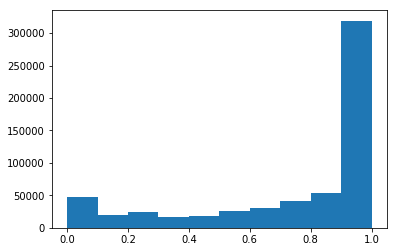

In [5]:
plt.hist(listing_df['perc_booked'])

In [27]:
export_df = listing_df.groupby(['listing_id', 'month'])['booked'].mean().unstack().fillna(0).reset_index()

print(test_df.head())
print(test_df.shape)

export_df.to_csv('mBookRates.csv')

month  listing_id   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  \
0            2454   0.0  12.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1            2515   8.0   0.0   0.0   0.0   0.0   0.0  17.0  21.0  17.0  20.0   
2            2539   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   
3            2595   0.0   0.0   0.0   5.0  13.0  21.0   0.0   0.0  12.0  10.0   
4            3330  22.0  27.0  24.0  26.0   0.0   0.0  23.0  19.0  16.0  28.0   

month  11.0  12.0  
0       0.0   0.0  
1      19.0  23.0  
2       0.0   0.0  
3       6.0  14.0  
4      27.0  15.0  
(81528, 13)


In [12]:
print(listing_df[listing_df['booked'] == 30])

          booked       date  listing_id  month  perc_booked  unbooked    year
11708       30.0 2018-07-01       11708    7.0     0.967742       1.0  2018.0
28342       30.0 2018-07-01       28342    7.0     0.967742       1.0  2018.0
50447       30.0 2018-07-01       50447    7.0     0.967742       1.0  2018.0
55467       30.0 2018-07-01       55467    7.0     0.967742       1.0  2018.0
62430       30.0 2018-07-01       62430    7.0     0.967742       1.0  2018.0
64837       30.0 2018-07-01       64837    7.0     0.967742       1.0  2018.0
65213       30.0 2018-07-01       65213    7.0     0.967742       1.0  2018.0
69894       30.0 2018-07-01       69894    7.0     0.967742       1.0  2018.0
75193       30.0 2018-07-01       75193    7.0     0.967742       1.0  2018.0
176653      30.0 2018-07-01      176653    7.0     0.967742       1.0  2018.0
182649      30.0 2018-07-01      182649    7.0     0.967742       1.0  2018.0
198629      30.0 2018-07-01      198629    7.0     0.967742     

In [14]:
listing_df.shape

(596950, 7)